<a href="https://colab.research.google.com/github/jimkliew/simple_factors/blob/main/Quick_Factors_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **"60/40"** -- The simplest way to gain exposure to stocks and bonds. Think of this as the average portfolio. ##
*  VTI: Vanguard **Total Stock Market** ETF
*  BND: Vanguard **Total Bond Market** ETF

-- Similar for iShares --
*  IVV: iShares Core **S&P 500** ETF
*  AGG: iShares Core **U.S. Aggregate Bond** ETF

---

Given your benchmark of **"60/40"**, now consider adding **"long-only factor"** exposures.

Equity Long-only Factors(Value, Momentum, Quality, Small, Low Vol.):
*  VTV (Vanguard **Value** ETF)
*  VUG (Vanguard **Growth** ETF)
*  MTUM (iShares MSCI USA **Momentum** Factor ETF)
*  QUAL (iShares Edge MSCI USA **Quality** Factor ETF)
*  IWM (iShares Russell 2000 ETF) (**"Small"**)
*  USMV (iShares MSCI USA Minimum Volatility ETF) ("**low vol.**")

Fixed Income Long-only Factors (Credit, Term, Inflation):
*  HYG (iShares iBoxx **High Yield** Corporate Bond ETF)
*  LQD (iShares iBoxx $ **Investment Grade** Corporate Bond ETF)
*  BIL (SPDR Bloomberg Barclays 1-3 Month **T-Bill** ETF)
*  TLT (iShares 20+ Year **Treasury Bond** ETF)
*  TIP (iShares **TIPS** Bond ETF)

---
The next iteration would be to take your 60/40 average portfolio and overlay each of the "long/short" factors thereby overlaying a cheap version of "alpha" on your average portfolio.


In [1]:
!pip install --upgrade nbformat nbconvert yfinance
!pip install pandas_datareader
!pip install --upgrade yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.38
    Uninstalling yfinance-0.2.38:
      Successfully uninstalled yfinance-0.2.38
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.5.4
    Uninstalling nbconvert-6.5.4:
      Successfully uninstalled nbconvert-6.5.4


Earliest common date for VTI and AGG: 2003-09-29 00:00:00
Latest common date for VTI and AGG: 2024-05-17 00:00:00

Monthly Returns:
Ticker           AGG       VTI
Date                          
2003-09-30  0.005188 -0.006037
2003-10-31 -0.009348  0.060523
2003-11-30  0.003344  0.015008
2003-12-31  0.009793  0.039988
2004-01-31  0.004405  0.026113

Weighted Returns:
                 AGG       VTI
Date                          
2003-09-30  0.002075 -0.003622
2003-10-31 -0.003739  0.036314
2003-11-30  0.001337  0.009005
2003-12-31  0.003917  0.023993
2004-01-31  0.001762  0.015668

Portfolio Returns:
Date
2003-09-30   -0.001547
2003-10-31    0.032575
2003-11-30    0.010342
2003-12-31    0.027910
2004-01-31    0.017429
Freq: M, dtype: float64

Cumulative Returns:
Date
2003-09-30   -0.001547
2003-10-31    0.030977
2003-11-30    0.041640
2003-12-31    0.070712
2004-01-31    0.089373
Freq: M, dtype: float64


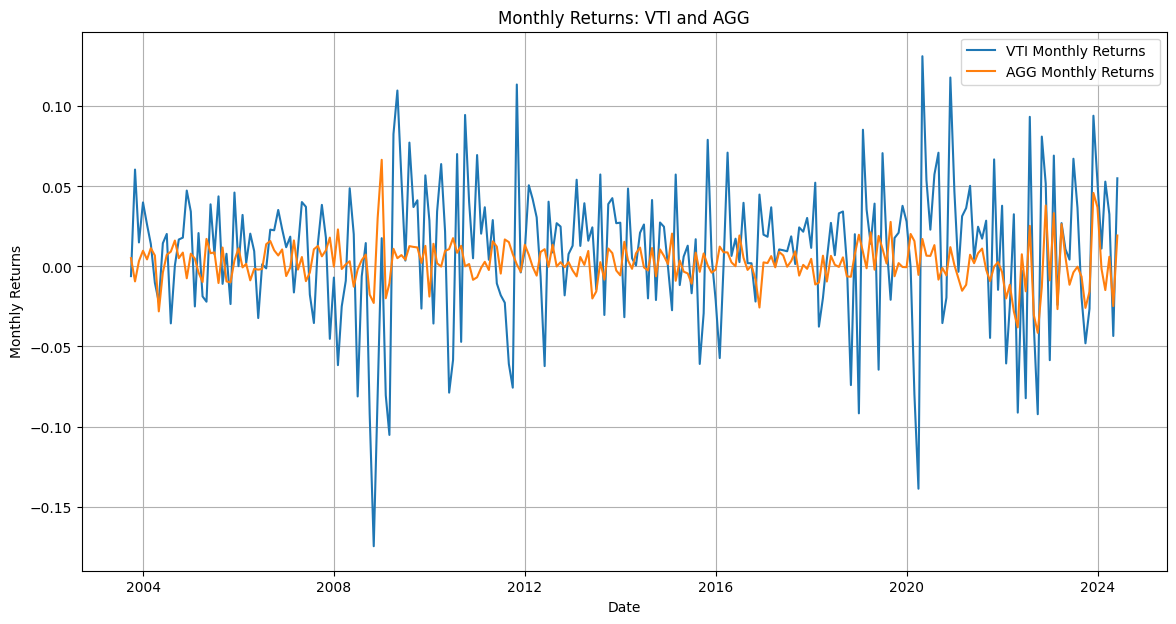

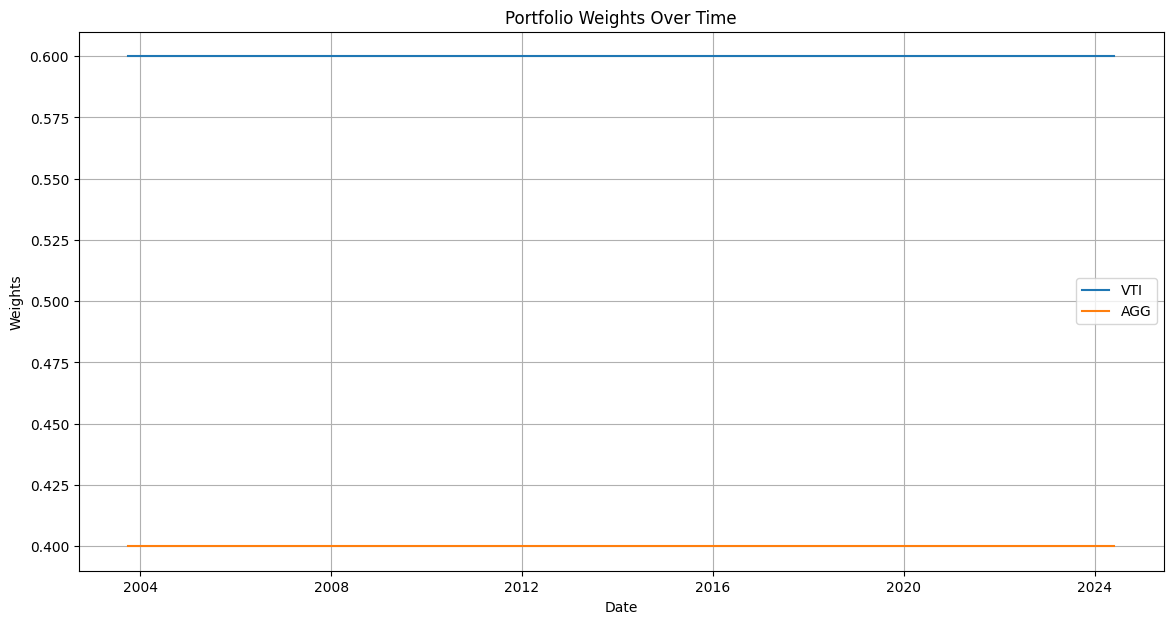

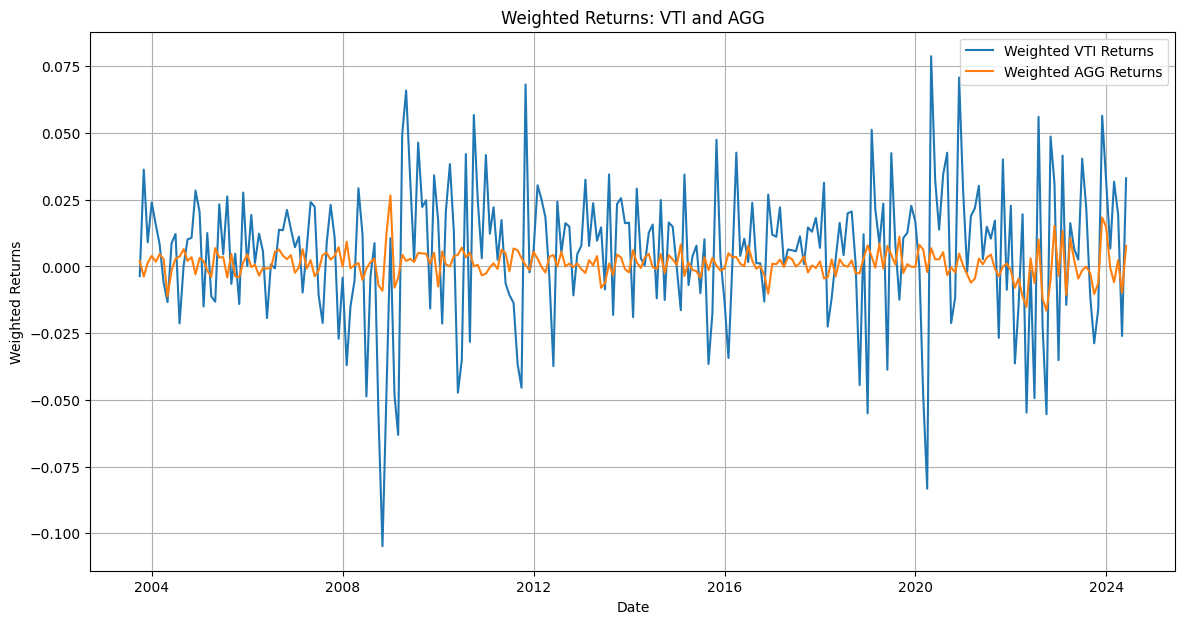

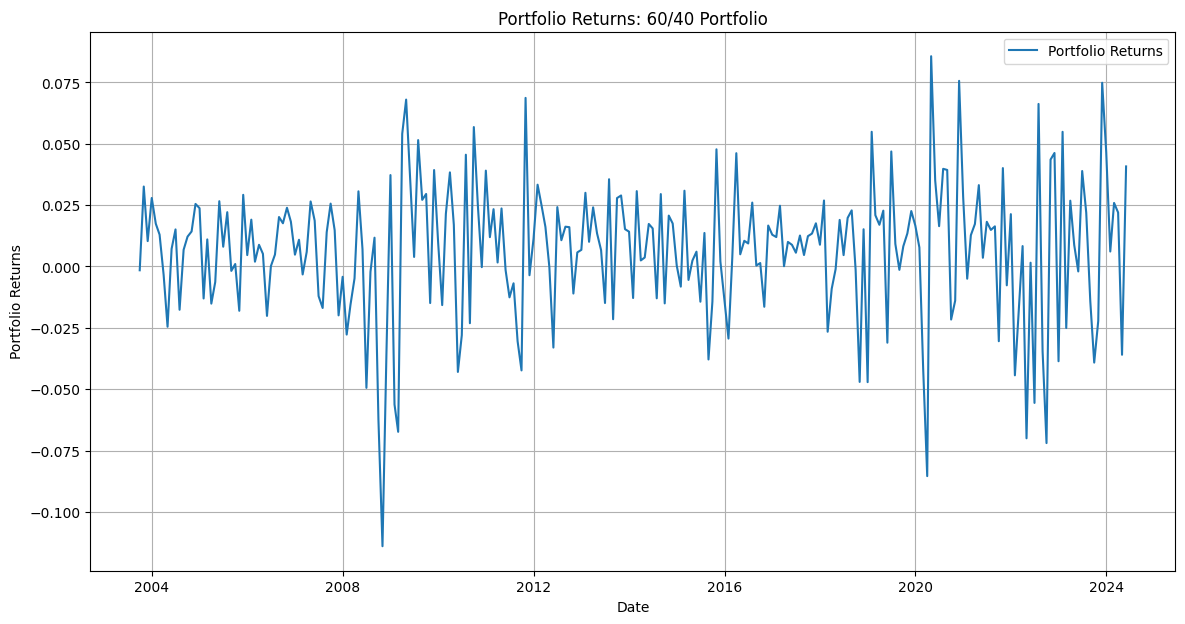

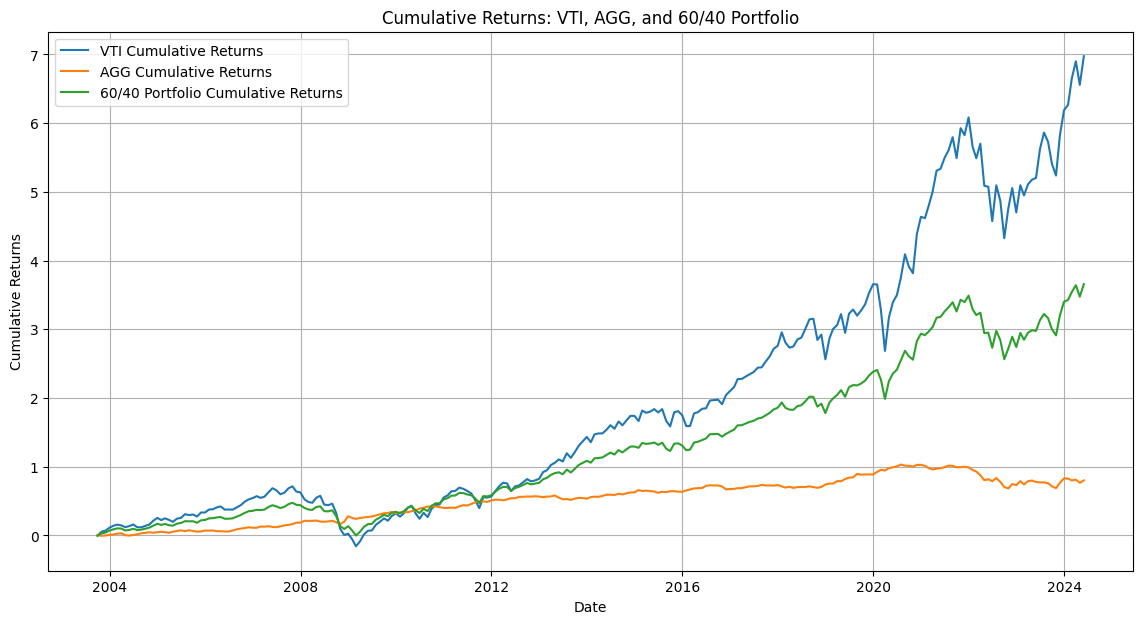

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to download historical data
def download_data(tickers):
    try:
        data = yf.download(tickers, progress=False)['Adj Close']
        return data
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Define the tickers
tickers = ['VTI', 'AGG']

# Download historical data
prices = download_data(tickers)

# Check if data was downloaded successfully
if prices is not None and not prices.empty:
    # Drop rows with any NaN values to find the common date range
    prices = prices.dropna()

    # Determine the earliest and latest common dates
    start_date = prices.index.min()
    end_date = prices.index.max()
    print(f"Earliest common date for VTI and AGG: {start_date}")
    print(f"Latest common date for VTI and AGG: {end_date}")

    # Trim the data to start from the earliest common date
    prices = prices.loc[start_date:end_date]

    # Function to calculate returns
    def calculate_returns(prices, period='M'):
        returns = prices.pct_change().dropna()
        if period == 'M':
            returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
        return returns

    # Calculate Monthly Returns
    monthly_returns = calculate_returns(prices, period='M')

    # Define 60/40 Portfolio Weights
    weights_60_40 = pd.Series({'VTI': 0.6, 'AGG': 0.4})

    # Calculate Weighted Returns
    weighted_returns = monthly_returns * weights_60_40

    # Calculate Portfolio Returns
    portfolio_returns = weighted_returns.sum(axis=1)

    # Calculate Cumulative Returns
    cumulative_returns_vti = (1 + monthly_returns['VTI']).cumprod() - 1
    cumulative_returns_agg = (1 + monthly_returns['AGG']).cumprod() - 1
    cumulative_returns_portfolio = (1 + portfolio_returns).cumprod() - 1

    # Print the results
    print("\nMonthly Returns:")
    print(monthly_returns.head())
    print("\nWeighted Returns:")
    print(weighted_returns.head())
    print("\nPortfolio Returns:")
    print(portfolio_returns.head())
    print("\nCumulative Returns:")
    print(cumulative_returns_portfolio.head())

    # Plot the Monthly Returns for VTI and AGG
    plt.figure(figsize=(14, 7))
    plt.plot(monthly_returns['VTI'], label='VTI Monthly Returns')
    plt.plot(monthly_returns['AGG'], label='AGG Monthly Returns')
    plt.title('Monthly Returns: VTI and AGG')
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the Weights Over Time
    weights_over_time = pd.DataFrame(index=monthly_returns.index, columns=['VTI', 'AGG'])
    weights_over_time['VTI'] = weights_60_40['VTI']
    weights_over_time['AGG'] = weights_60_40['AGG']

    plt.figure(figsize=(14, 7))
    plt.plot(weights_over_time)
    plt.title('Portfolio Weights Over Time')
    plt.xlabel('Date')
    plt.ylabel('Weights')
    plt.legend(weights_over_time.columns)
    plt.grid(True)
    plt.show()

    # Plot the Weights Multiplied by Returns
    plt.figure(figsize=(14, 7))
    plt.plot(weighted_returns['VTI'], label='Weighted VTI Returns')
    plt.plot(weighted_returns['AGG'], label='Weighted AGG Returns')
    plt.title('Weighted Returns: VTI and AGG')
    plt.xlabel('Date')
    plt.ylabel('Weighted Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the Portfolio Returns
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_returns, label='Portfolio Returns')
    plt.title('Portfolio Returns: 60/40 Portfolio')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the Cumulative Returns for VTI, AGG, and the Portfolio
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_returns_vti, label='VTI Cumulative Returns')
    plt.plot(cumulative_returns_agg, label='AGG Cumulative Returns')
    plt.plot(cumulative_returns_portfolio, label='60/40 Portfolio Cumulative Returns')
    plt.title('Cumulative Returns: VTI, AGG, and 60/40 Portfolio')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Data download failed.")


Thus far the code works. Now let's do the same for the factors.
Create long/short factors

HML (High Minus Low): Represents the value factor.
HML
=
VTV
−
VUG
HML=VTV−VUG
SMB (Small Minus Big): Represents the size factor.
SMB
=
IWM
−
VTI
SMB=IWM−VTI
QAL (Quality): Represents the quality factor.
QAL
=
QUAL
−
VTI
QAL=QUAL−VTI
MOM (Momentum): Represents the momentum factor.
MOM
=
MTUM
−
VTI
MOM=MTUM−VTI
MINVOL (Minimum Volatility): Represents the low volatility factor.
MINVOL
=
USMV
−
VTI
MINVOL=USMV−VTI
Credit: Represents the credit risk factor.
Credit
=
0.5
×
(
HYG
+
LQD
)
−
TLT
Credit=0.5×(HYG+LQD)−TLT
Term: Represents the term structure factor.
Term
=
TLT
−
BIL
Term=TLT−BIL
Inflation: Represents the inflation risk factor.
Inflation
=
TIP
−
TLT
Inflation=TIP−TLT

Earliest common date for the data: 2013-04-18 00:00:00
Latest common date for the data: 2024-05-17 00:00:00

MOM Factor:
                 MOM
Date                
2013-04-21 -0.009593
2013-04-28 -0.002187
2013-05-05 -0.002602
2013-05-12 -0.008902
2013-05-19 -0.012805


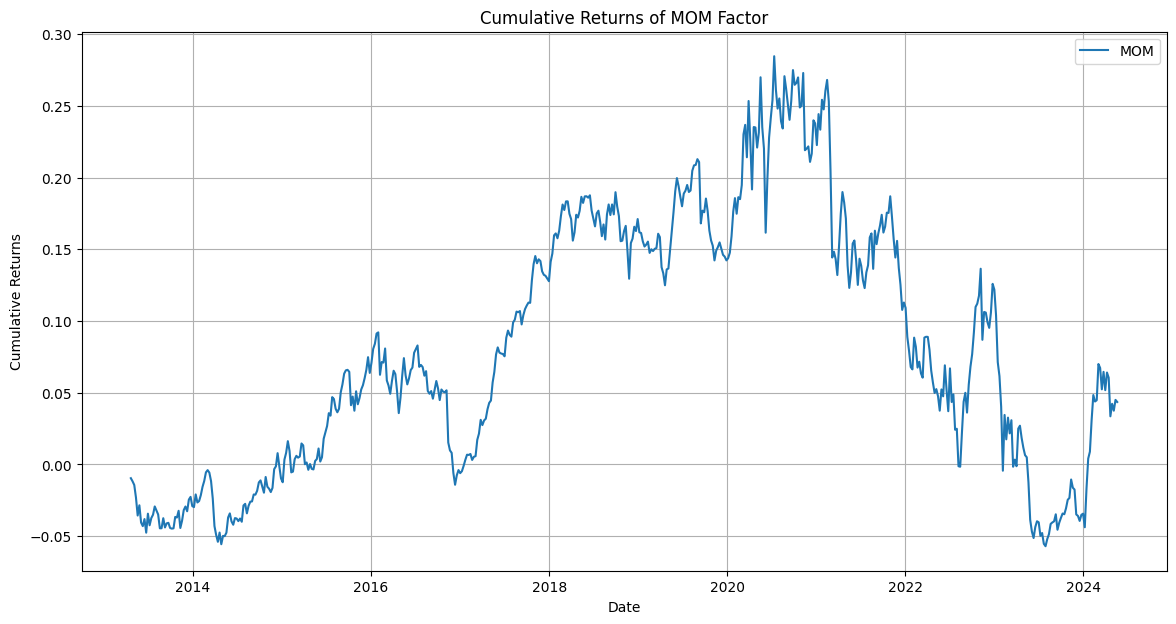

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to download historical data
def download_data(tickers):
    try:
        data = yf.download(tickers, progress=False)['Adj Close']
        return data
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Function to calculate returns
def calculate_returns(prices, period='W'):
    returns = prices.pct_change().dropna()
    if period == 'W':
        returns = returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    return returns

# Download historical data for VTI and MTUM
tickers = ['VTI', 'MTUM']
prices = download_data(tickers)

# Check if data was downloaded successfully
if prices is not None and not prices.empty:
    # Drop rows with any NaN values to find the common date range
    prices = prices.dropna()

    # Determine the earliest and latest common dates
    start_date = prices.index.min()
    end_date = prices.index.max()
    print(f"Earliest common date for the data: {start_date}")
    print(f"Latest common date for the data: {end_date}")

    # Trim the data to start from the earliest common date
    prices = prices.loc[start_date:end_date]

    # Calculate Weekly Returns
    weekly_returns = calculate_returns(prices, period='W')

    # Construct the MOM Factor
    factors = pd.DataFrame({
        'MOM': weekly_returns['MTUM'] - weekly_returns['VTI']
    })

    # Print the first few rows of the MOM factor
    print("\nMOM Factor:")
    print(factors.head())

    # Plot the cumulative returns of the MOM factor
    cumulative_factors = (1 + factors).cumprod() - 1
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_factors['MOM'], label='MOM')
    plt.title('Cumulative Returns of MOM Factor')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Data download failed.")


Earliest common date for the data: 2013-04-18 00:00:00
Latest common date for the data: 2024-05-17 00:00:00

MOM Factor:
                 MOM
Date                
2013-04-21 -0.009593
2013-04-28 -0.002187
2013-05-05 -0.002602
2013-05-12 -0.008902
2013-05-19 -0.012805

Combined Returns:
            60/40 Portfolio       MOM  60/40 with MOM
Date                                                 
2013-04-21         0.005792 -0.009593        0.004253
2013-04-28         0.012227 -0.002187        0.010785
2013-05-05         0.010341 -0.002602        0.009047
2013-05-12         0.007266 -0.008902        0.005649
2013-05-19         0.012053 -0.012805        0.009567


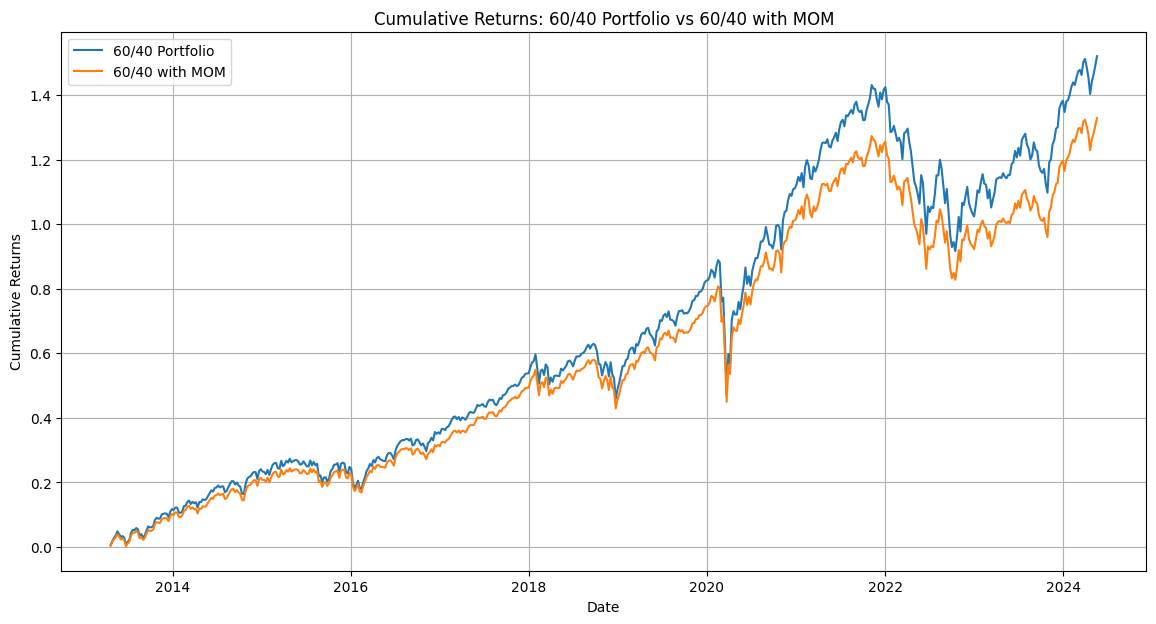

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to download historical data
def download_data(tickers):
    try:
        data = yf.download(tickers, progress=False)['Adj Close']
        return data
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Function to calculate returns
def calculate_returns(prices, period='W'):
    returns = prices.pct_change().dropna()
    if period == 'W':
        returns = returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    return returns

# Download historical data for VTI, AGG, and MTUM
tickers = ['VTI', 'AGG', 'MTUM']
prices = download_data(tickers)

# Check if data was downloaded successfully
if prices is not None and not prices.empty:
    # Drop rows with any NaN values to find the common date range
    prices = prices.dropna()

    # Determine the earliest and latest common dates
    start_date = prices.index.min()
    end_date = prices.index.max()
    print(f"Earliest common date for the data: {start_date}")
    print(f"Latest common date for the data: {end_date}")

    # Trim the data to start from the earliest common date
    prices = prices.loc[start_date:end_date]

    # Calculate Weekly Returns
    weekly_returns = calculate_returns(prices, period='W')

    # Construct the MOM Factor
    factors = pd.DataFrame({
        'MOM': weekly_returns['MTUM'] - weekly_returns['VTI']
    })

    # Print the first few rows of the MOM factor
    print("\nMOM Factor:")
    print(factors.head())

    # Define 60/40 Portfolio Weights
    weights_60_40 = pd.Series({'VTI': 0.6, 'AGG': 0.4})

    # Calculate 60/40 Portfolio Returns
    weighted_returns_60_40 = weekly_returns[weights_60_40.index] * weights_60_40
    portfolio_returns_60_40 = weighted_returns_60_40.sum(axis=1)

    # Combine 60/40 Portfolio with MOM Factor
    weights_with_mom = pd.Series({'VTI': 0.55, 'AGG': 0.35, 'MOM': 0.10})
    combined_returns = pd.DataFrame({
        '60/40 Portfolio': portfolio_returns_60_40,
        'MOM': factors['MOM']
    })
    combined_returns['60/40 with MOM'] = combined_returns['60/40 Portfolio'] * 0.90 + combined_returns['MOM'] * 0.10

    # Calculate Cumulative Returns
    cumulative_returns_60_40 = (1 + combined_returns['60/40 Portfolio']).cumprod() - 1
    cumulative_returns_with_mom = (1 + combined_returns['60/40 with MOM']).cumprod() - 1

    # Print the first few rows of the combined returns
    print("\nCombined Returns:")
    print(combined_returns.head())

    # Plot the cumulative returns of both portfolios
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_returns_60_40, label='60/40 Portfolio')
    plt.plot(cumulative_returns_with_mom, label='60/40 with MOM')
    plt.title('Cumulative Returns: 60/40 Portfolio vs 60/40 with MOM')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Data download failed.")


Earliest common date for the data: 2013-07-18 00:00:00
Latest common date for the data: 2024-05-17 00:00:00

Long/Short Factors:
                 HML       SMB       QAL       MOM    MINVOL  High Credit  \
Date                                                                        
2013-07-21  0.001289  0.000049 -0.009264  0.002948  0.000877    -0.010315   
2013-07-28 -0.002882 -0.001936  0.002096  0.005957 -0.001588     0.005367   
2013-08-04 -0.005675 -0.001777  0.005278 -0.002988 -0.007929     0.008136   
2013-08-11 -0.000242 -0.001844  0.002103 -0.002796  0.003515    -0.005804   
2013-08-18 -0.002711 -0.000927  0.000716 -0.009975 -0.005143     0.015033   

            Low Credit      Term  Inflation  
Date                                         
2013-07-21   -0.016453  0.015814  -0.008621  
2013-07-28   -0.002220 -0.009489  -0.000256  
2013-08-04    0.011227 -0.012723   0.015709  
2013-08-11   -0.013887  0.006946  -0.000018  
2013-08-18    0.024909 -0.036267   0.011126  


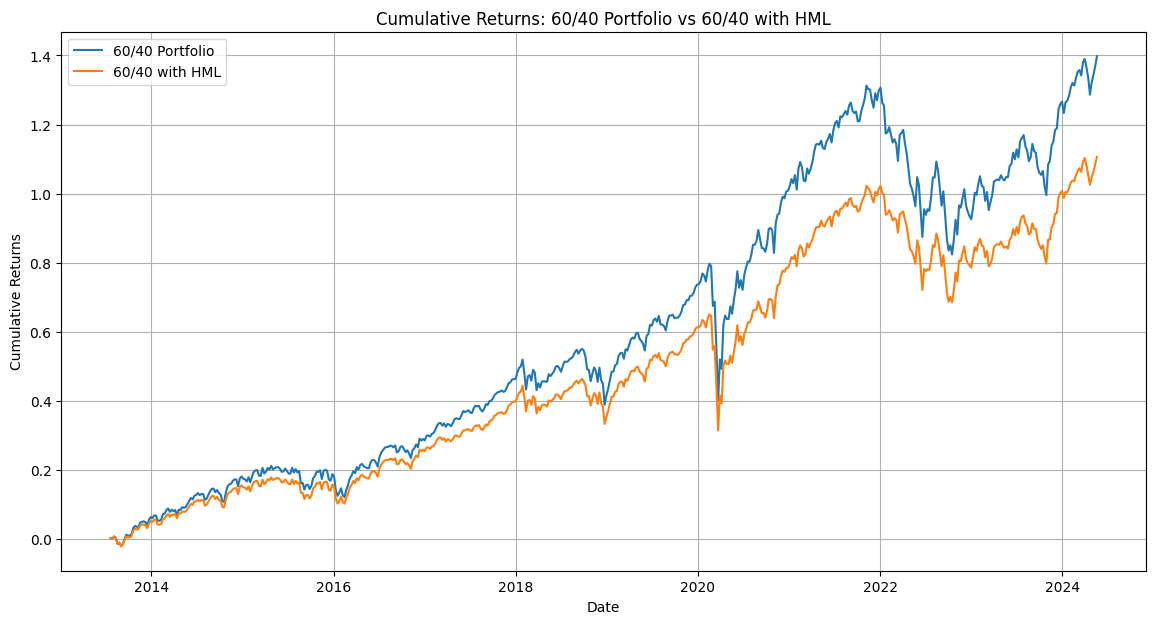

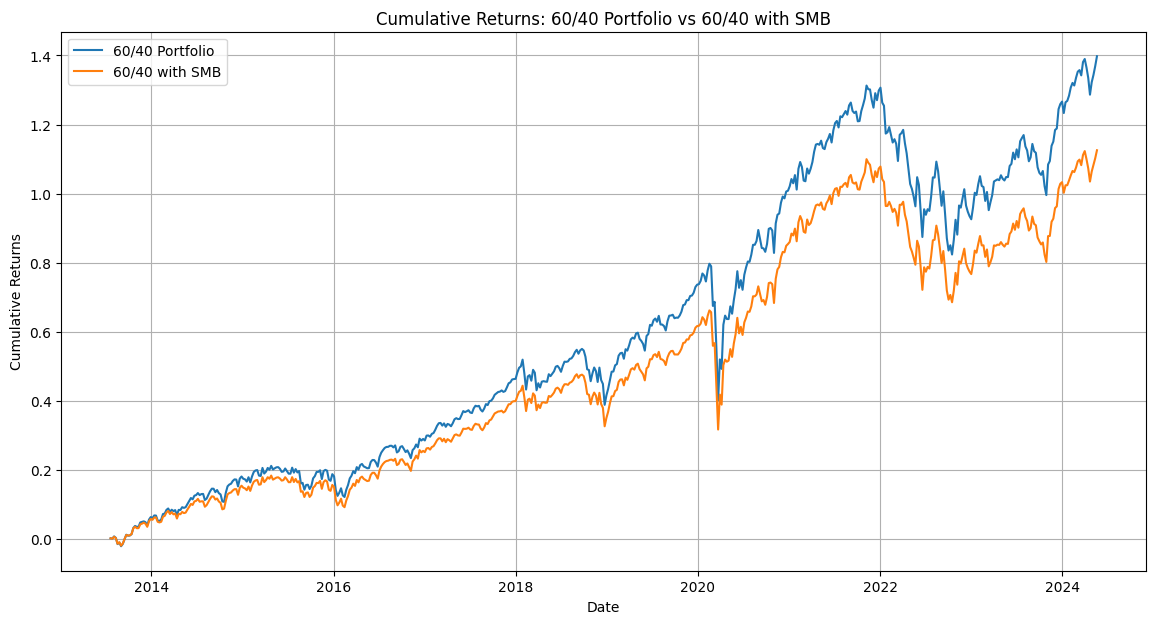

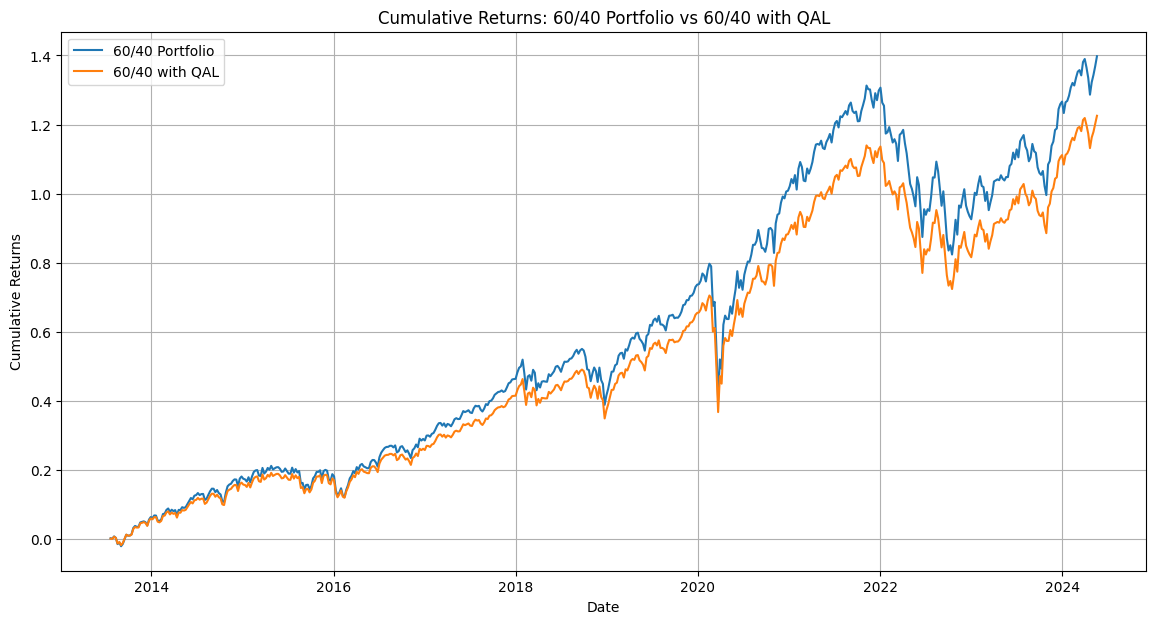

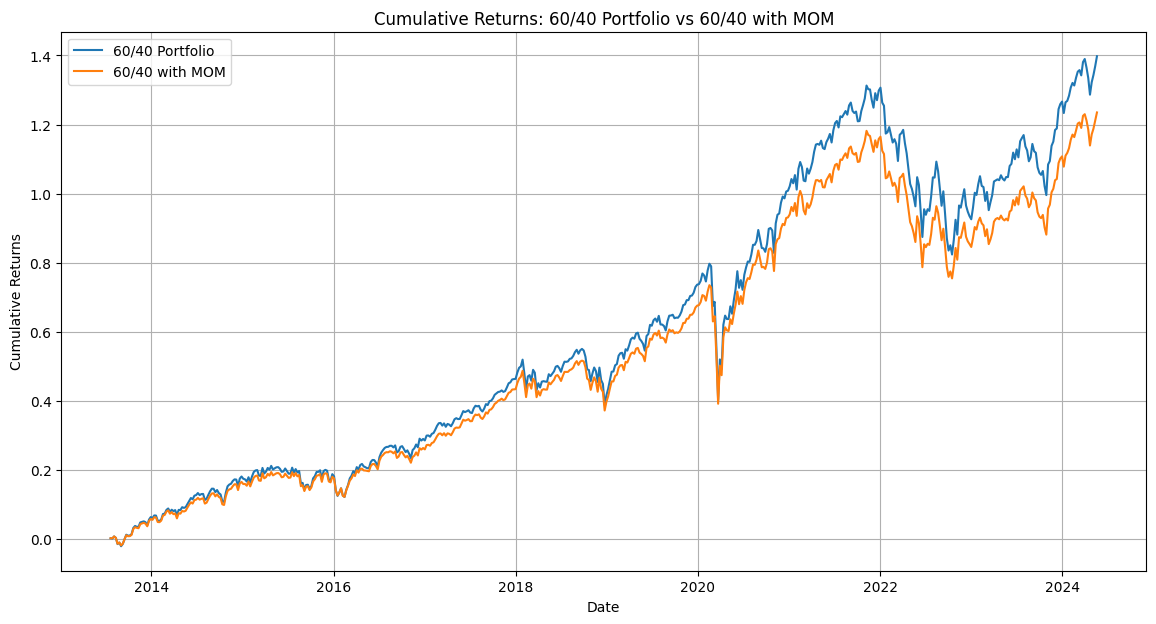

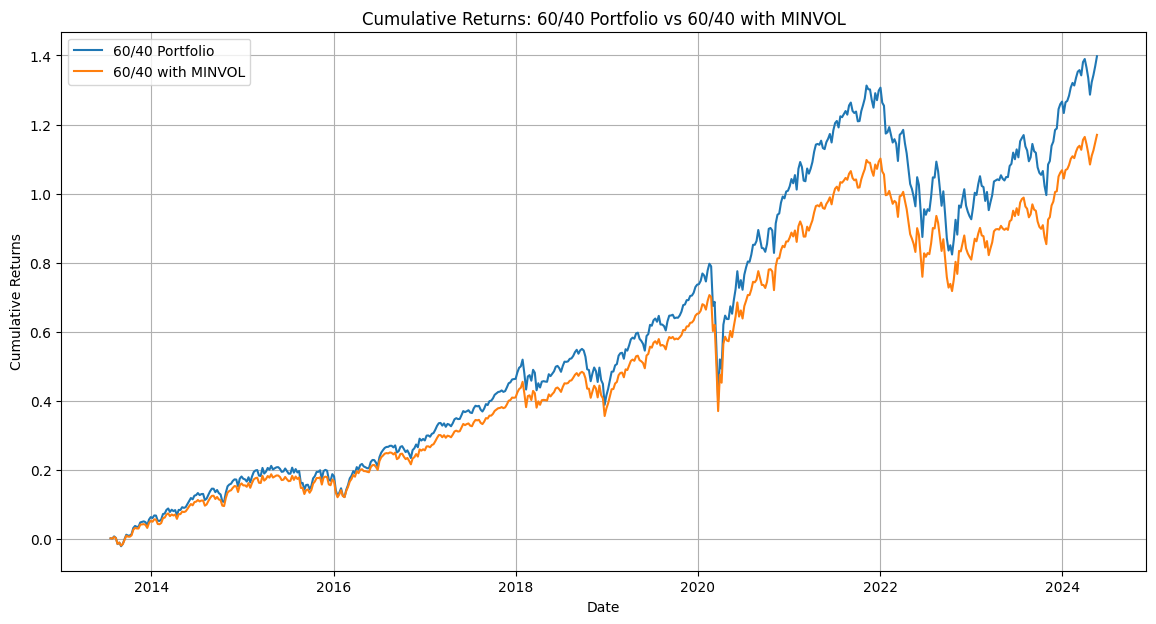

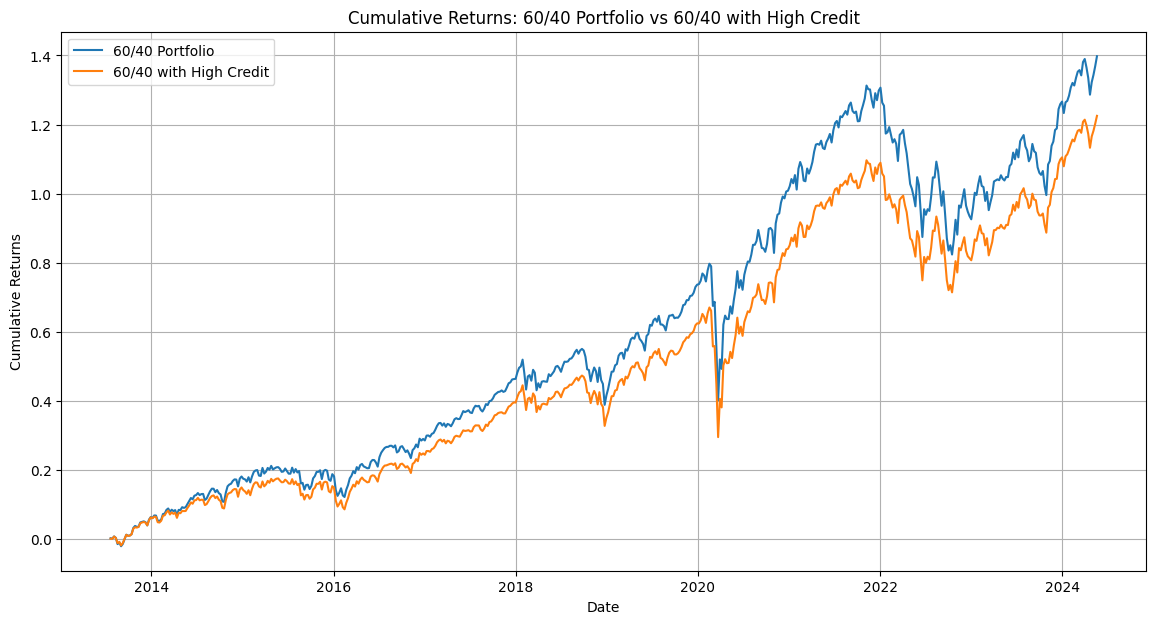

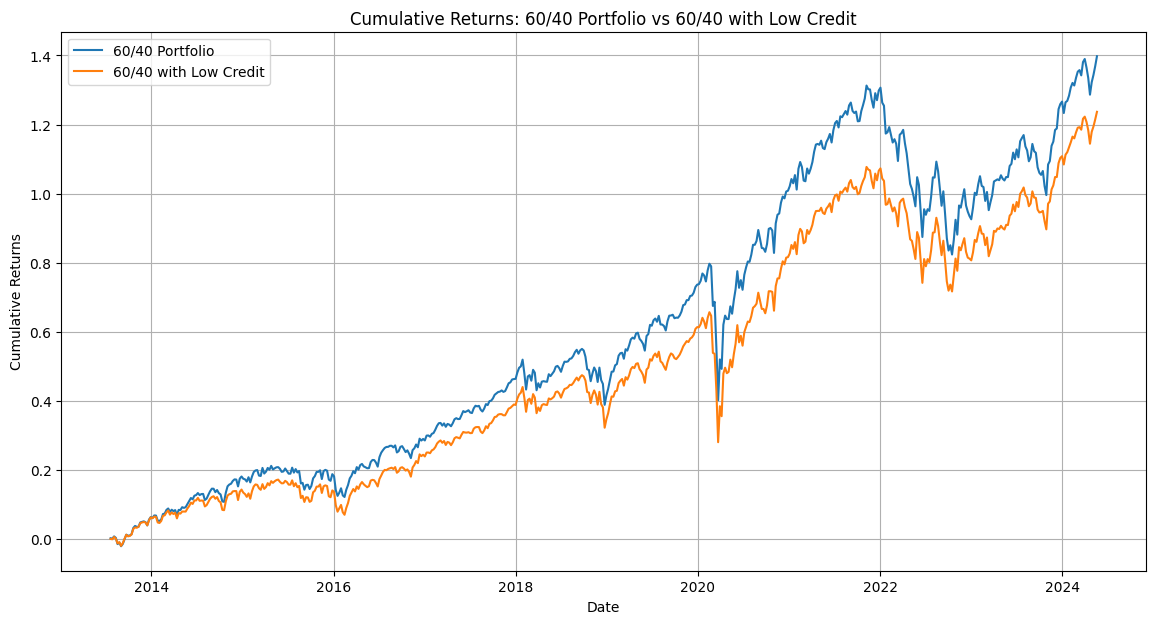

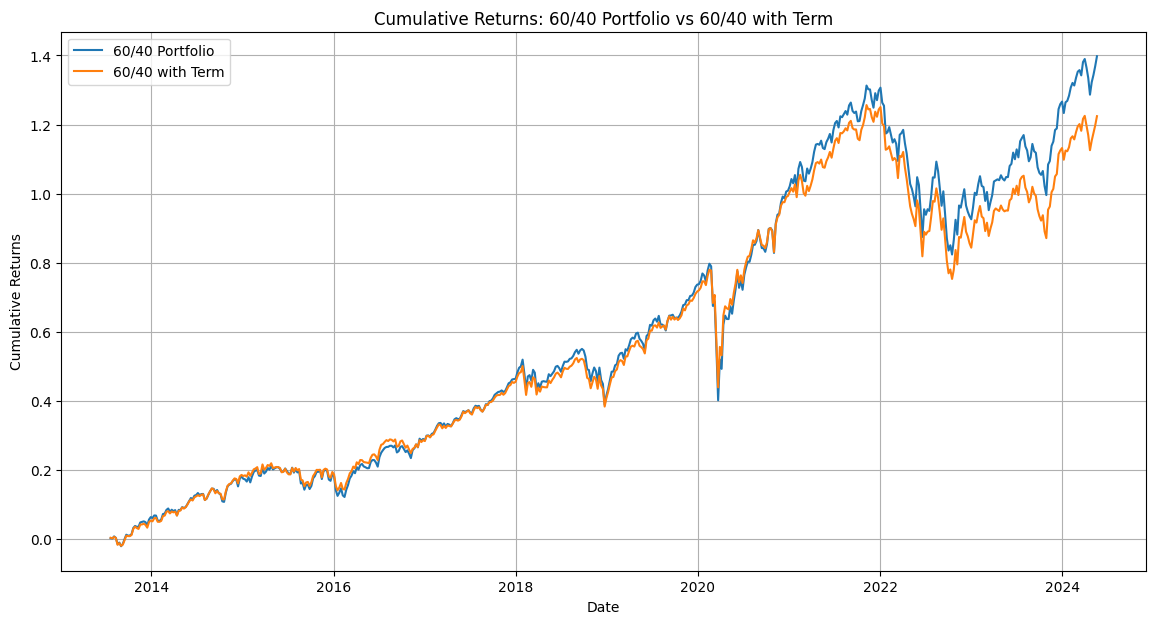

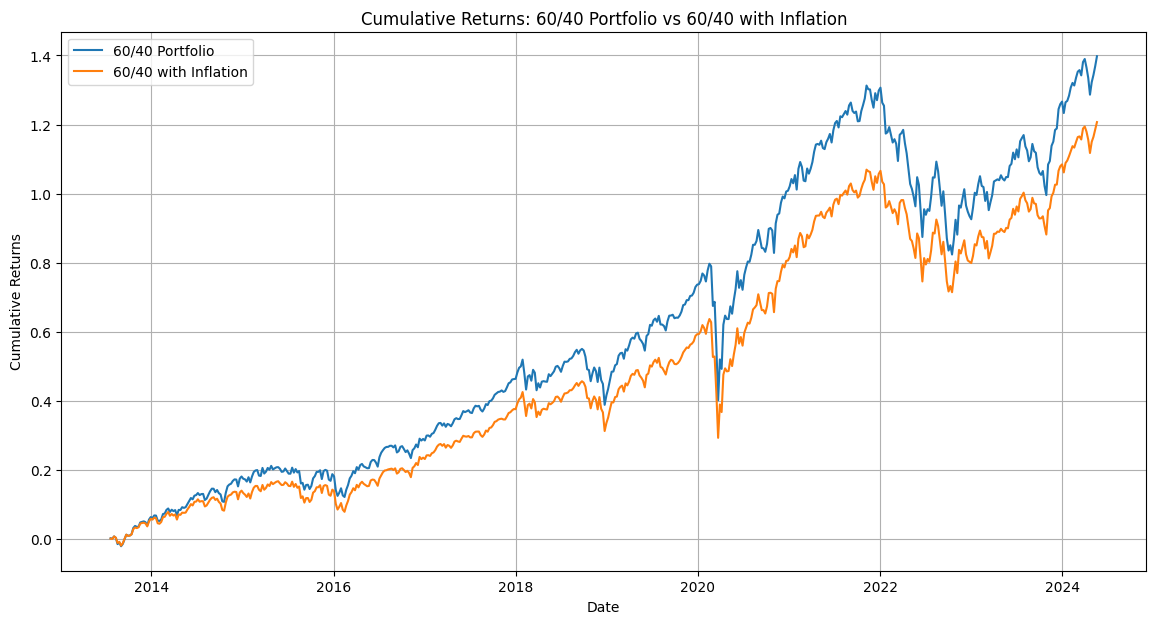

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to download historical data
def download_data(tickers):
    try:
        data = yf.download(tickers, progress=False)['Adj Close']
        return data
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Function to calculate returns
def calculate_returns(prices, period='W'):
    returns = prices.pct_change().dropna()
    if period == 'W':
        returns = returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    return returns

# Function to construct and compare portfolios
def compare_portfolios_with_factor(factor_name, factor_series):
    # Define 60/40 Portfolio Weights
    weights_60_40 = pd.Series({'VTI': 0.6, 'AGG': 0.4})

    # Calculate 60/40 Portfolio Returns
    weighted_returns_60_40 = weekly_returns[weights_60_40.index] * weights_60_40
    portfolio_returns_60_40 = weighted_returns_60_40.sum(axis=1)

    # Combine 60/40 Portfolio with the Factor
    combined_returns = pd.DataFrame({
        '60/40 Portfolio': portfolio_returns_60_40,
        factor_name: factor_series
    })
    combined_returns['60/40 with ' + factor_name] = combined_returns['60/40 Portfolio'] * 0.9 + combined_returns[factor_name] * 0.1

    # Calculate Cumulative Returns
    cumulative_returns_60_40 = (1 + combined_returns['60/40 Portfolio']).cumprod() - 1
    cumulative_returns_with_factor = (1 + combined_returns['60/40 with ' + factor_name]).cumprod() - 1

    # Plot the cumulative returns of both portfolios
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_returns_60_40, label='60/40 Portfolio')
    plt.plot(cumulative_returns_with_factor, label='60/40 with ' + factor_name)
    plt.title(f'Cumulative Returns: 60/40 Portfolio vs 60/40 with {factor_name}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

# Download historical data for all required ETFs
tickers = ['VTI', 'VTV', 'VUG', 'IWM', 'QUAL', 'MTUM', 'USMV', 'HYG', 'LQD', 'TLT', 'BIL', 'TIP', 'AGG']
prices = download_data(tickers)

# Check if data was downloaded successfully
if prices is not None and not prices.empty:
    # Drop rows with any NaN values to find the common date range
    prices = prices.dropna()

    # Determine the earliest and latest common dates
    start_date = prices.index.min()
    end_date = prices.index.max()
    print(f"Earliest common date for the data: {start_date}")
    print(f"Latest common date for the data: {end_date}")

    # Trim the data to start from the earliest common date
    prices = prices.loc[start_date:end_date]

    # Calculate Weekly Returns
    weekly_returns = calculate_returns(prices, period='W')

    # Construct Long/Short Factors
    factors = pd.DataFrame({
        'HML': weekly_returns['VTV'] - weekly_returns['VUG'],
        'SMB': weekly_returns['IWM'] - weekly_returns['VTI'],
        'QAL': weekly_returns['QUAL'] - weekly_returns['VTI'],
        'MOM': weekly_returns['MTUM'] - weekly_returns['VTI'],
        'MINVOL': weekly_returns['USMV'] - weekly_returns['VTI'],
        'High Credit': weekly_returns['LQD'] - weekly_returns['TLT'],
        'Low Credit': weekly_returns['HYG'] - weekly_returns['TLT'],
        'Term': weekly_returns['TLT'] - weekly_returns['BIL'],
        'Inflation': weekly_returns['TIP'] - weekly_returns['TLT']
    })

    # Print the first few rows of the factors
    print("\nLong/Short Factors:")
    print(factors.head())

    # Compare portfolios with each factor
    for factor_name in factors.columns:
        compare_portfolios_with_factor(factor_name, factors[factor_name])
else:
    print("Data download failed.")


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np

# Function to download historical data
def download_data(tickers):
    try:
        data = yf.download(tickers, progress=False)['Adj Close']
        return data
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

# Function to calculate returns
def calculate_returns(prices, period='W'):
    returns = prices.pct_change().dropna()
    if period == 'W':
        returns = returns.resample('W').apply(lambda x: (1 + x).prod() - 1)
    return returns

# Download historical data for all required ETFs
tickers = ['VTI', 'VTV', 'VUG', 'IWM', 'QUAL', 'MTUM', 'USMV', 'HYG', 'LQD', 'TLT', 'BIL', 'TIP']
prices = download_data(tickers)

# Check if data was downloaded successfully
if prices is not None and not prices.empty:
    # Drop rows with any NaN values to find the common date range
    prices = prices.dropna()

    # Determine the earliest and latest common dates
    start_date = prices.index.min()
    end_date = prices.index.max()
    print(f"Earliest common date for the data: {start_date}")
    print(f"Latest common date for the data: {end_date}")

    # Trim the data to start from the earliest common date
    prices = prices.loc[start_date:end_date]

    # Calculate Weekly Returns
    weekly_returns = calculate_returns(prices, period='W')

    # Construct Long/Short Factors
    factors = pd.DataFrame({
        'HML': weekly_returns['VTV'] - weekly_returns['VUG'],
        'SMB': weekly_returns['IWM'] - weekly_returns['VTI'],
        'QAL': weekly_returns['QUAL'] - weekly_returns['VTI'],
        'MOM': weekly_returns['MTUM'] - weekly_returns['VTI'],
        'MINVOL': weekly_returns['USMV'] - weekly_returns['VTI'],
        'High Credit': weekly_returns['LQD'] - weekly_returns['TLT'],
        'Low Credit': weekly_returns['HYG'] - weekly_returns['TLT'],
        'Term': weekly_returns['TLT'] - weekly_returns['BIL'],
        'Inflation': weekly_returns['TIP'] - weekly_returns['TLT']
    })

    # Calculate descriptive statistics
    def annualize_return(weekly_return):
        return ((1 + weekly_return.mean())**52 - 1)

    def annualize_std(weekly_return):
        return weekly_return.std() * np.sqrt(52)

    stats = factors.describe().transpose()
    stats['Annualized Return'] = factors.apply(annualize_return)
    stats['Annualized Std'] = factors.apply(annualize_std)
    stats['Number of Observations'] = factors.count()
    stats['Start Date'] = start_date
    stats['End Date'] = end_date

    # Calculate the correlation table
    correlation_matrix = factors.corr()

    # Format the output nicely
    stats = stats[['Annualized Return', 'Annualized Std', 'Number of Observations', 'Start Date', 'End Date']]
    pd.options.display.float_format = '{:.4f}'.format

    print("\nDescriptive Statistics:")
    print(stats)

    print("\nCorrelation Matrix:")
    print(correlation_matrix)

else:
    print("Data download failed.")


Earliest common date for the data: 2013-07-18 00:00:00
Latest common date for the data: 2024-05-17 00:00:00

Descriptive Statistics:
             Annualized Return  Annualized Std  Number of Observations  \
HML                    -0.0448          0.1118                     566   
SMB                    -0.0319          0.0952                     566   
QAL                     0.0064          0.0325                     566   
MOM                     0.0109          0.0822                     566   
MINVOL                 -0.0191          0.0682                     566   
High Credit             0.0120          0.1138                     566   
Low Credit              0.0196          0.1628                     566   
Term                    0.0079          0.1390                     566   
Inflation               0.0004          0.1056                     566   

            Start Date   End Date  
HML         2013-07-18 2024-05-17  
SMB         2013-07-18 2024-05-17  
QAL         2013-0